# Parkinsons csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  
%matplotlib notebook 

#notes 
# under 'status' 1=PD, 0=Healthy

##### head and info for data

In [2]:
PD = pd.read_csv('parkinsons.csv') 
PD.head() 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
PD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
PD2 = PD.drop('name', axis=1)
X = PD2.drop('status', axis=1) 
Y = PD2['status']  

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size =0.2) 

In [5]:
#finds accuracy for how well it can correctly match data to correct status 
from statistics import mean

PD2 = PD.drop('name', axis=1)
X = PD2.drop('status', axis=1) 
Y = PD2['status']  

AcList = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=i, test_size =0.2) 
    classifier = KNeighborsClassifier(n_neighbors = 3) 
    classifier.fit(X_train, y_train) 
    pred= classifier.predict(X_test) 
    correct = np.where(pred == y_test, 1, 0).sum()
    accuracy = correct/len(y_test) 
    AcList.append(accuracy) 

print(AcList) 
print("Average KNeighbor acuracy:", mean(AcList))


[0.8974358974358975, 0.8461538461538461, 0.7692307692307693, 0.8205128205128205, 0.8205128205128205]
Average KNeighbor acuracy: 0.8307692307692308


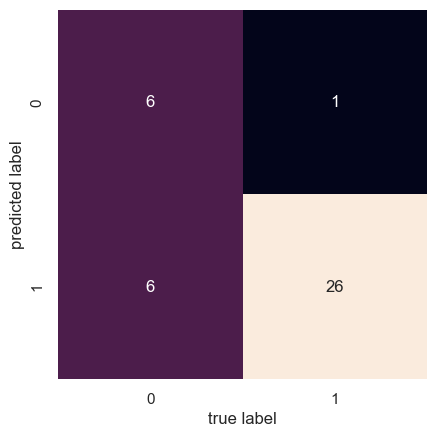

In [6]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set() 

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');  

In [7]:
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate the model
model.fit(X_train, y_train)                   # 4. fit the model to the data
y_model = model.predict(X_test)    

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model) 

#bad accuracy  
#Might have to remove insignificant data columns

0.717948717948718

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))  

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.81      0.96      0.88        27

    accuracy                           0.82        39
   macro avg       0.83      0.73      0.76        39
weighted avg       0.83      0.82      0.80        39



In [11]:
#SVM- 
from statistics import mean
x = X  
y = Y 

SVMlist = []
for i in range(5):
    Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, random_state=i, test_size =0.2)  
    scaler = StandardScaler() 
    scaler.fit(Xtrain) 
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest) 

    model = svm.SVC(kernel='linear') 
    model.fit(Xtrain, ytrain) 

    X_train_pred = model.predict(Xtrain)
    training_data_accuracy = accuracy_score(ytrain, X_train_pred)  
    SVMlist.append(training_data_accuracy) 
    

print('Accuracy (Training Data) :', SVMlist) 
print('Average Accuracy (Training Data) :', mean(SVMlist)*100, '%')   



Accuracy (Training Data) : [0.8974358974358975, 0.9038461538461539, 0.8846153846153846, 0.8782051282051282, 0.9102564102564102]
Average Accuracy (Training Data) : 89.48717948717949 %


In [12]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, X_train_pred))  

              precision    recall  f1-score   support

           0       0.96      0.64      0.77        36
           1       0.90      0.99      0.94       120

    accuracy                           0.91       156
   macro avg       0.93      0.82      0.86       156
weighted avg       0.91      0.91      0.90       156



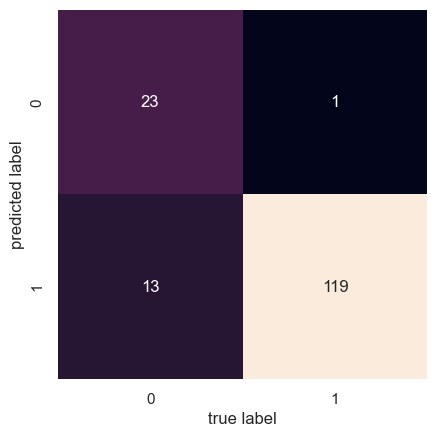

In [13]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set() 

mat = confusion_matrix(ytrain, X_train_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');  


In [14]:
input_data = (95.730,132.068,91.754, 
              0.00551,0.00006,0.00293,0.00332,
              0.00880,0.02093,0.191,0.01073,
              0.01277,0.01717,0.03218,0.01070,
              21.812,0.615551,0.773587,-5.498678,
              0.327769,2.322511,0.231571)

# changing input data to numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the numpy array 
input_data_reshape = input_data_numpy.reshape(1,-1)

#standardizing the input data 
std_data = scaler.transform(input_data_reshape)

## prediction
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The patient has Parkinson')
elif (prediction[0] == 0):
  print('The patient does not have Parkinson')
else:
  print('Some error in processing')

[1]
The patient has Parkinson


/Users/yabserabekele/miniconda3/envs/pytorch111_env/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


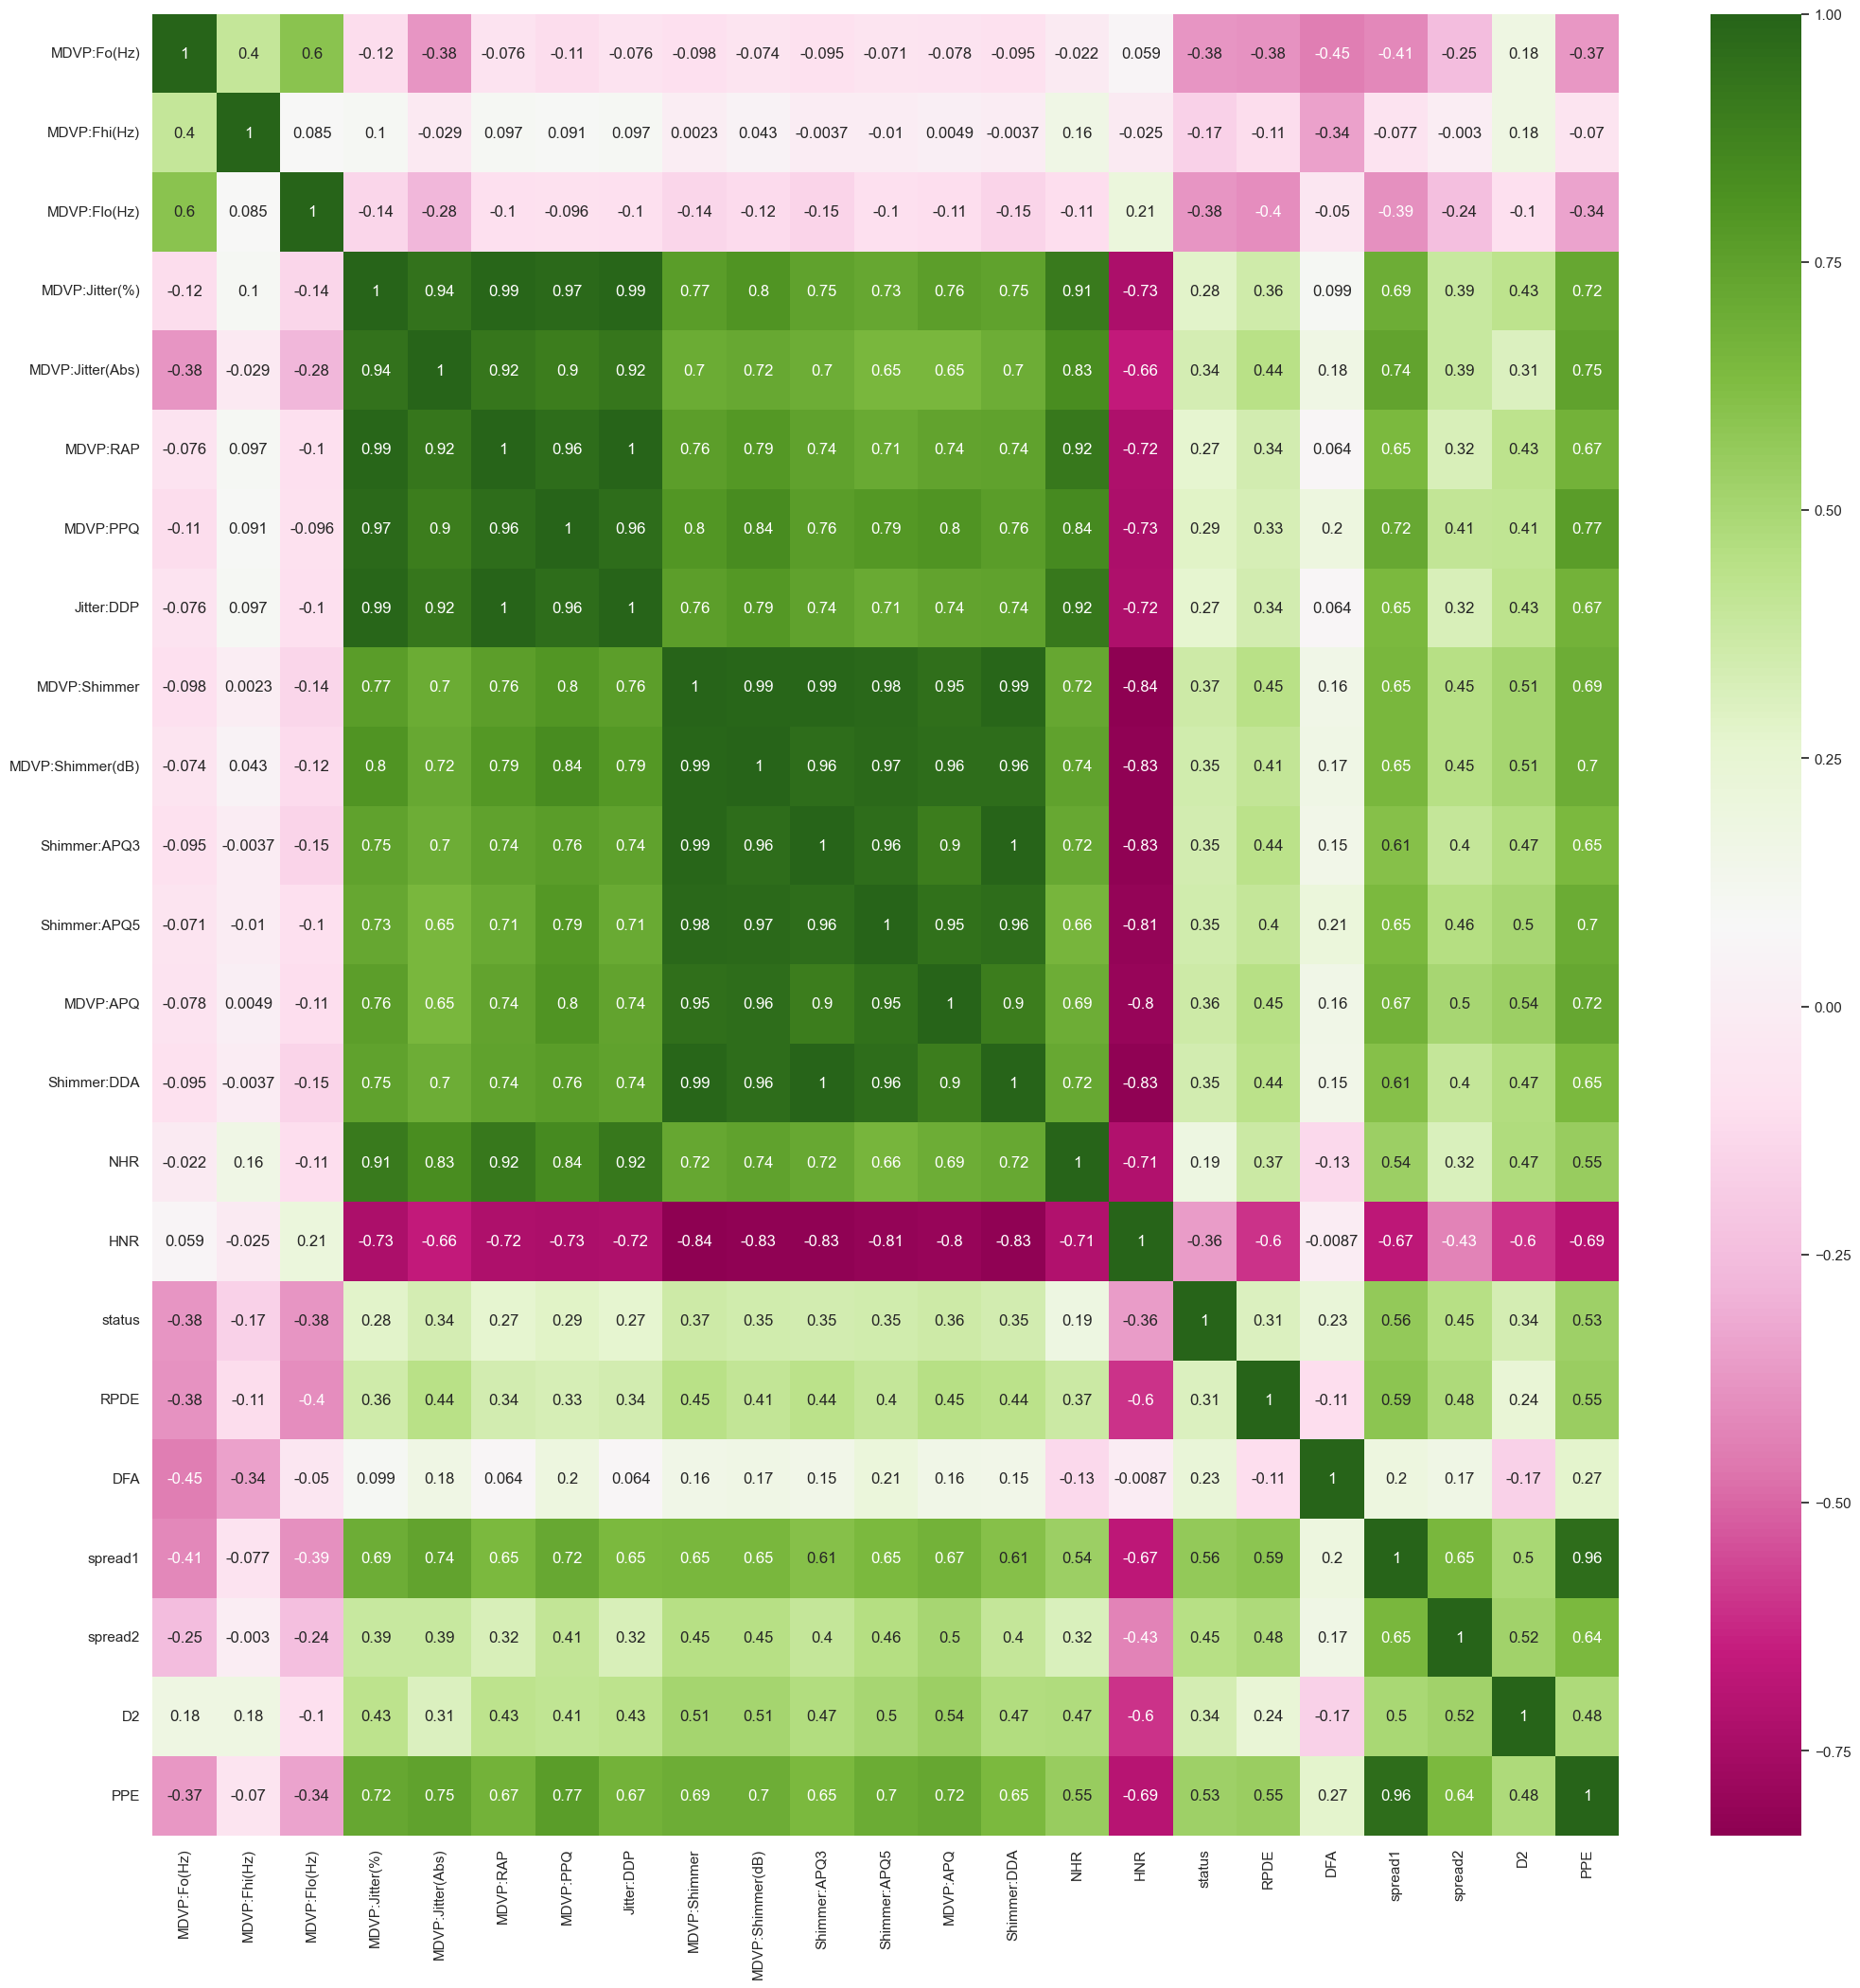

In [15]:
plt.figure(figsize=(25, 25))
p = sns.heatmap(PD.corr(), annot=True, cmap="PiYG")

In [23]:
#SVM- adjusted 
from statistics import mean
x1 = X.drop(['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)'],axis=1)   
y1 = Y

SVMlist = []
for j in range(5):
    Xtrain, Xtest, ytrain, ytest = train_test_split(x1,y1, random_state=j, test_size =0.2)  
    scaler = StandardScaler() 
    scaler.fit(Xtrain) 
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest) 

    model = svm.SVC(kernel='linear') 
    model.fit(Xtrain, ytrain) 

    X_train_pred = model.predict(Xtrain)
    training_data_accuracy = accuracy_score(ytrain, X_train_pred)  
    SVMlist.append(training_data_accuracy) 
    

print('Accuracy (Training Data) :', SVMlist) 
print('Average Accuracy (Training Data) :', mean(SVMlist)*100, '%')  


Accuracy (Training Data) : [0.8974358974358975, 0.8782051282051282, 0.8974358974358975, 0.8653846153846154, 0.8910256410256411]
Average Accuracy (Training Data) : 88.58974358974359 %
